<a href="https://colab.research.google.com/github/shaikmdnisaar/imdbProject/blob/main/IMDB_Movies_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets take a look...
Before training begins, we need to see what exactly we have scraped from IMDB. This examination will take the form of Exploratory Data Analysis (EDA). Based on what we learn about the data, we should get a better idea about the kind of performance our final model will give us. Lets take a look!

Imports and setup

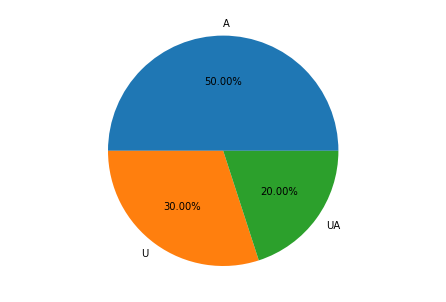

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


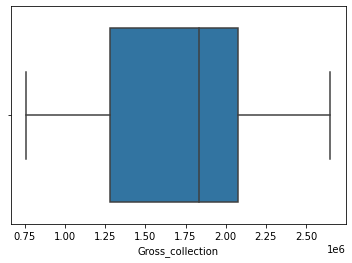

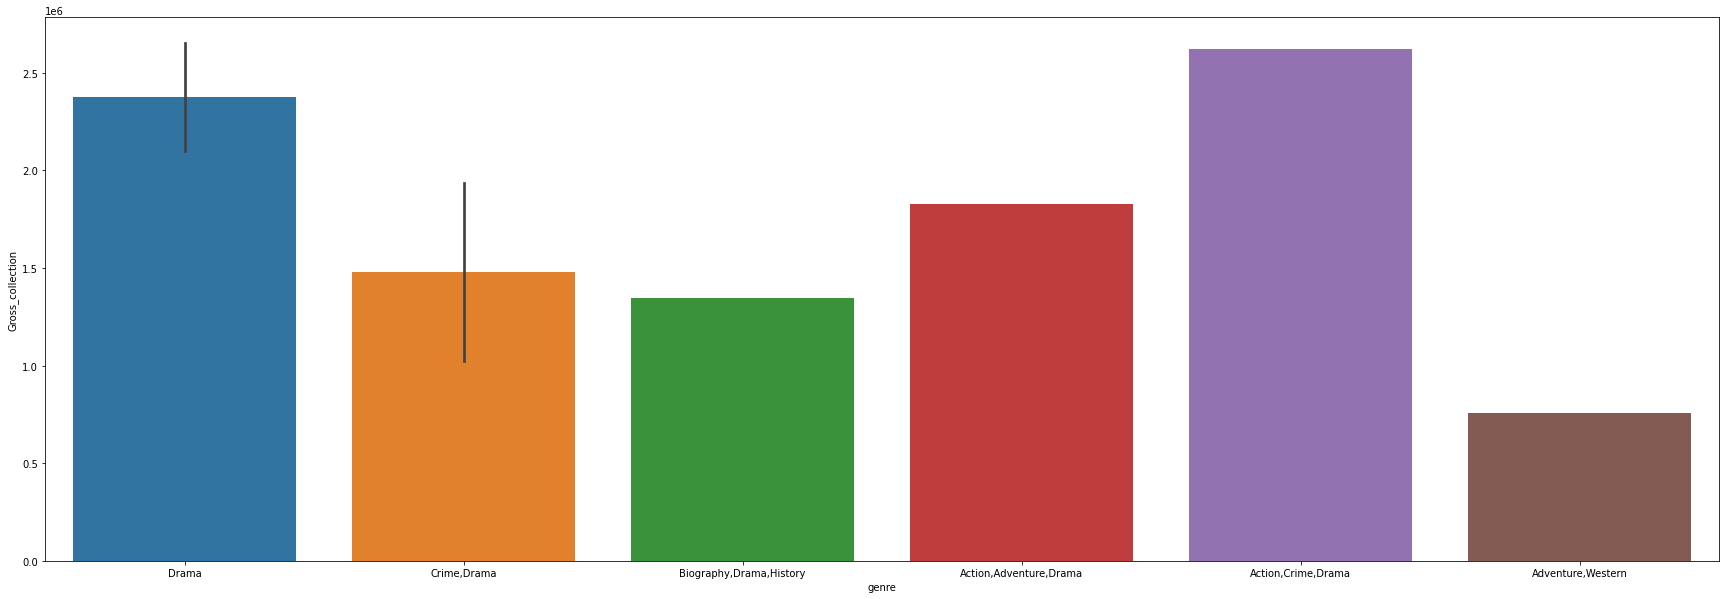

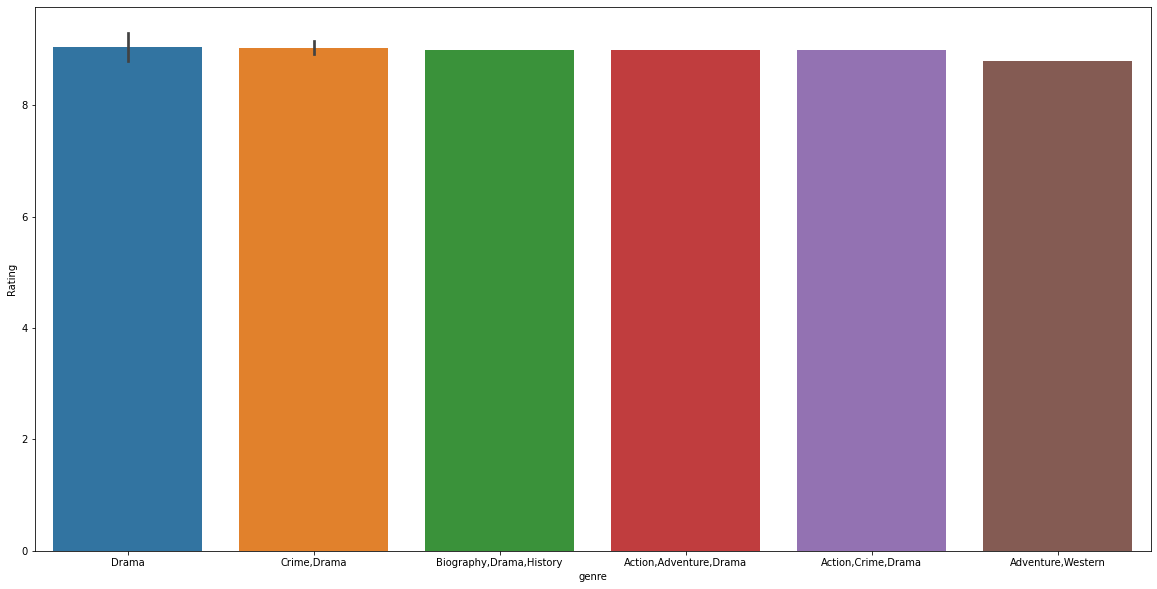

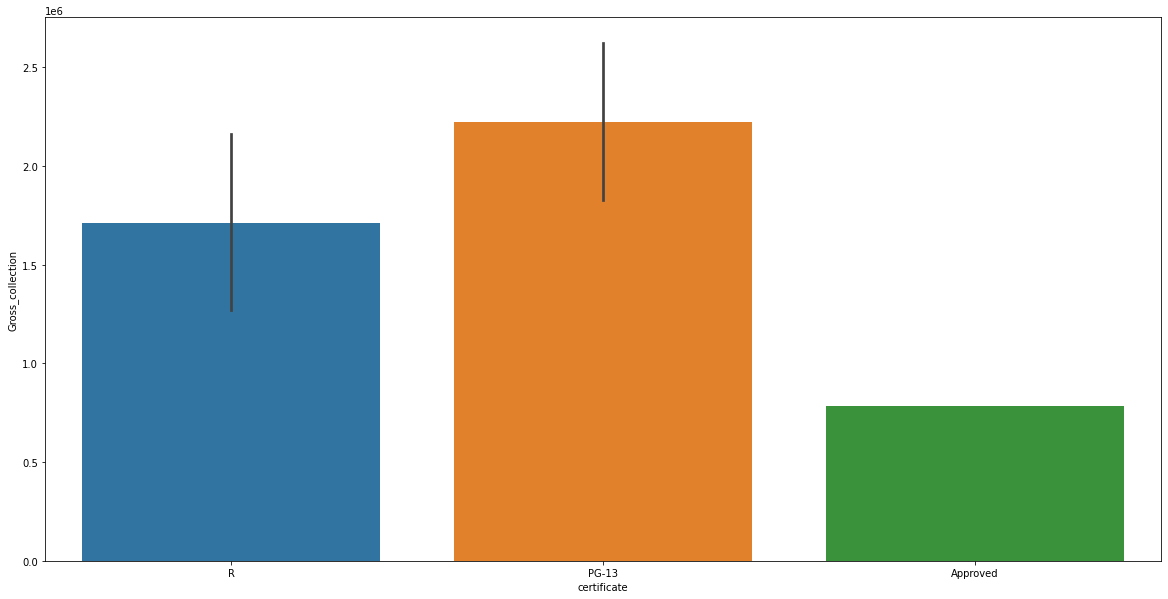

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


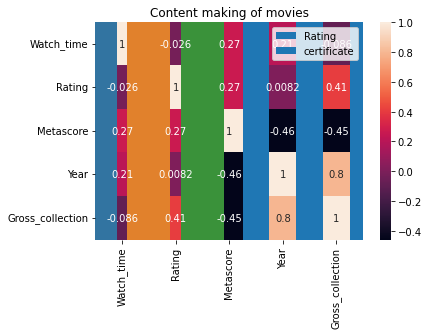

In [1]:
# IMDB Movies Rating Analysis

## Imports Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
from bs4 import BeautifulSoup
import re


# Website

website="https://www.imdb.com/list/ls006266261/?sort=list_order,asc&st_dt=&mode=detail&page=1"

# Get Requests

response=requests.get(website)


# Status code

response.status_code

# Soup Object

soup=BeautifulSoup(response.content,"html.parser")
soup

movie_data=soup.findAll("div",{"class":"lister-item mode-detail"})

movie_data

# DataFrame

movie_name=[]
time=[]
rating=[]
metascore=[]
year=[]
gross=[]
genre=[]
certificate=[]

for i in range(1,6):
    
    website="https://www.imdb.com/list/ls006266261/?sort=list_order,asc&st_dt=&mode=detail&page="+str(i)    
    response=requests.get(website).text
    soup=BeautifulSoup(response,"html.parser")
    movie_data=soup.findAll("div",{"class":"lister-item mode-detail"})
    
    for store in movie_data:
        
        name=store.h3.a.text 
        movie_name.append(name)
    
    
        runtime=store.p.find("span", class_="runtime").text.replace("min","") 
        time.append(runtime)
    

        rate=store.find("span",class_="ipl-rating-star__rating").text
        rating.append(rate)
        
        meta=store.find("span",class_="metascore")
        metascore.append(meta)
        
        genres=store.p.find("span",class_="genre").text.replace("\n","").replace(" ","") 
        genre.append(genres)
        
        certificates=store.p.find("span",class_="certificate") 
        certificate.append(certificates)
        
        year_of_release=store.h3.find("span", class_="lister-item-year text-muted unbold").text.replace("(","").replace(")","") 
        year.append(year_of_release)
        
       
    
        
        value=store.findAll("span",attrs={"name":"nv"})
        gros=value[0].text.replace("$","").replace("M","").replace(",","")
        gross.append(gros)
        
        
        
        
        
    

movie_DF=pd.DataFrame({"Name_of_the_movie":movie_name,"Watch_time":time,"Rating":rating,"Metascore":metascore,"Year":year,"Gross_collection":gross,"genre":genre,"certificate":certificate})
movie_DF.to_csv("moviesdata.csv")

# Dataset of the data

movie_DF

movie_DF.head()

# Task 2: Cleaning the Data

movie_DF.isnull().sum(axis=0)


movie_DF.describe()

movie_DF.duplicated()

movie_DF.isnull()

movie_DF.dropna(axis=0,how="any").shape

movie_DF.dropna(axis=0,how="any",inplace=True)

movie_DF.isnull()

movie_DF.isnull().sum(axis=0)


# Changing data types

movie_DF.dtypes

movie_DF["Watch_time"]=movie_DF.Watch_time.astype(int)

movie_DF["Rating"]=movie_DF.Rating.astype(float)

movie_DF["Year"]=movie_DF["Year"].apply(lambda x:x.replace("I","")).astype(int)

movie_DF["Gross_collection"]=movie_DF.Gross_collection.astype(float)

a = []
for i in movie_DF.Metascore:
    if i != None:
        a.append(i.text)
    else:
        a.append(np.nan)

movie_DF.Metascore=a

a = []
for i in movie_DF.certificate:
    if i != None:
        a.append(i.text)
    else:
        a.append(np.nan)

movie_DF.certificate=a

movie_DF["Metascore"]=movie_DF.Metascore.astype(int)

movie_DF.dtypes

# Top 10 Movies

t=movie_DF.sort_values(by="Rating",ascending=False).head(10)
t

# Univarient (Pie Plot)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
certificate = ['A','U','UA']
values = [5,3,2]
ax.pie(values, labels = certificate,autopct='%1.2f%%')
plt.show()

np.mean(t)

sns.boxplot(x="Gross_collection",data=t)

# Bivarient

plt.figure(figsize=(30,10))
sns.barplot(x="genre",y='Gross_collection',data=t)
plt.show()

plt.figure(figsize=(20,10))
sns.barplot(x="genre",y='Rating',data=t)
plt.show()

plt.figure(figsize=(20,10))
sns.barplot(x='certificate',y="Gross_collection",data=t)
plt.show()



bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,6.5,7,7.5,8,8.5,9,9.5]
movies= movie_DF.groupby(pd.cut(movie_DF['Rating'], bins=bins)).Rating.count()
movies.plot(kind='bar')


# Certificates list

movie_DF.certificate.value_counts()

movie_DF.certificate.value_counts().plot(kind="bar",xlabel="certificates",ylabel="Number of movies",title="Content making of movies")

t.certificate.value_counts()

t.sort_values(by="Gross_collection",ascending=False)

sns.barplot(x='certificate',y='Rating',data=t) 

# Point plot(Bi-Variant) 

sns.pointplot(x='Metascore',y='Rating',data=t,color='darkorange')

# Regplot(Gross_collection Vs Rating)

sns.regplot(movie_DF['Gross_collection'],movie_DF['Rating'],color='darkorange')



# Scatterplot(Watch_time Vs Rating)

sns.scatterplot(movie_DF["Watch_time"],movie_DF['Rating'],color='Black')

t.describe()



# Multivariant(Top 10 movies)

sns.heatmap(t.corr(),annot=True)
plt.show()



